# Getting Started

In [ ]:
pip install openpyxl

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("Life Expectancy at Birth.xlsx", engine="openpyxl")

In [4]:
df.dropna(inplace=True)

In [5]:
df.rename(
    columns={
        "Country": "country",
        "Country Code": "country_code",
        "Region": "region",
        "Income Group": "income_group",
        "Year": "year",
        "Life Expectancy": "life_expectancy",
    },
    inplace=True,
)

In [6]:
sample = df.groupby("region").sample(n=20).sort_values(by="year")

In [7]:
sample.head(10)

,country,country_code,region,income_group,year,life_expectancy
248,United States,USA,North America,High income,1960,69.770732
344,Ghana,GHA,Sub-Saharan Africa,Lower middle income,1961,46.266707
503,Tunisia,TUN,Middle East & North Africa,Lower middle income,1961,42.645512
664,Lesotho,LSO,Sub-Saharan Africa,Lower middle income,1962,47.402244
872,Guinea,GIN,Sub-Saharan Africa,Low income,1963,35.425171
964,Nepal,NPL,South Asia,Low income,1963,36.425171
1106,Djibouti,DJI,Middle East & North Africa,Lower middle income,1964,45.708634
1565,St. Vincent and the Grenadines,VCT,Latin America & Caribbean,Upper middle income,1965,62.347463
1472,Myanmar,MMR,East Asia & Pacific,Lower middle income,1965,46.966390
1366,Cyprus,CYP,Europe & Central Asia,High income,1965,71.165073


In [8]:
from patsy import dmatrices

In [9]:
outcome, predictors = dmatrices(
    "life_expectancy ~ income_group + region + year", data=sample
)

In [10]:
outcome

DesignMatrix with shape (140, 1)
  life_expectancy
         69.77073
         46.26671
         42.64551
         47.40224
         35.42517
         36.42517
         45.70863
         62.34746
         46.96639
         71.16507
         63.63863
         68.82088
         70.50732
         69.00537
         60.24490
         70.80439
         46.54956
         68.65046
         70.70732
         54.42012
         67.42244
         69.29000
         47.73302
         67.72390
         73.93041
         72.95610
         73.22439
         68.47815
         42.60083
         72.95854
  [110 rows omitted]
  Terms:
    'life_expectancy' (column 0)
  (to view full data, use np.asarray(this_obj))

In [11]:
predictors

DesignMatrix with shape (140, 11)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'year']
  Terms:
    'Intercept' (column 0)
    'income_group' (columns 1:4)
    'region' (columns 4:10)
    'year' (column 10)
  (to view full data, use np.asarray(this_obj))

In [13]:
import numpy as np 

In [14]:
np.asarray(predictors)[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [15]:
np.asarray(predictors)[:10, 1:4]

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [16]:
np.asarray(predictors)[:5, 4:10]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    predictors, outcome, test_size=0.2, random_state=42
)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

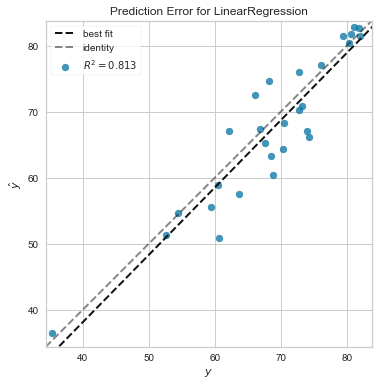

In [19]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error
from IPython.core.pylabtools import figsize

figsize(6, 6)
model = LinearRegression()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

In [20]:
def split_data_into_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()
    return X_train, X_test, y_train, y_test


def plot_equation(data: pd.DataFrame, equation: str):

    # Create X and y
    outcome, predictors = dmatrices(equation, data=data)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data_into_train_test(predictors, outcome)

    # Instantiate a model
    model = LinearRegression()

    # Visualize model
    visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

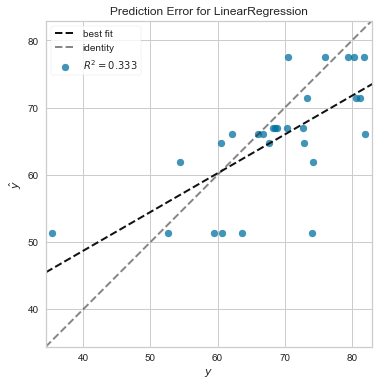

In [21]:
plot_equation(sample, "life_expectancy ~ region")

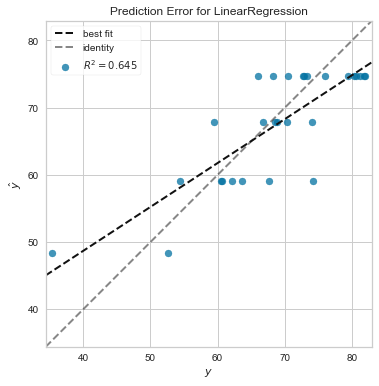

In [22]:
plot_equation(sample, "life_expectancy ~ income_group")

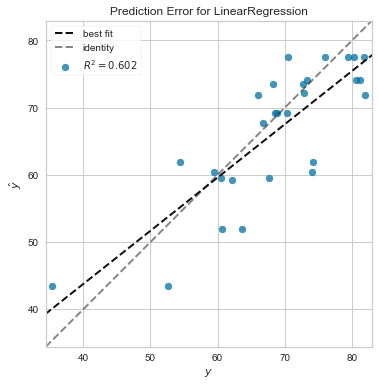

In [23]:
plot_equation(sample, "life_expectancy ~ income_group + region")

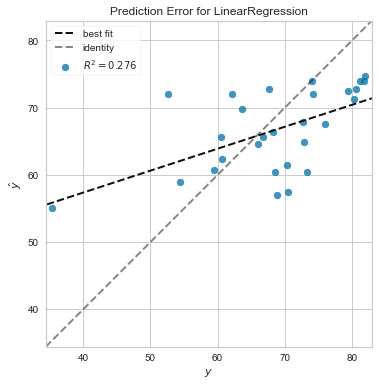

In [24]:
plot_equation(sample, "life_expectancy ~ year")

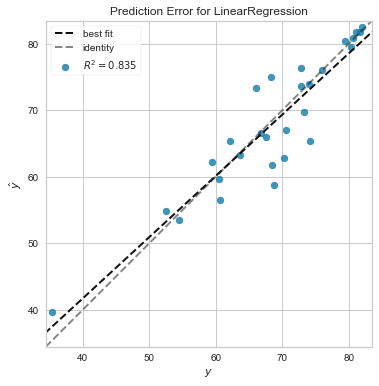

In [25]:
plot_equation(sample, "life_expectancy ~ income_group + year")

In [26]:
sample

,country,country_code,region,income_group,year,life_expectancy
248,United States,USA,North America,High income,1960,69.770732
344,Ghana,GHA,Sub-Saharan Africa,Lower middle income,1961,46.266707
503,Tunisia,TUN,Middle East & North Africa,Lower middle income,1961,42.645512
664,Lesotho,LSO,Sub-Saharan Africa,Lower middle income,1962,47.402244
872,Guinea,GIN,Sub-Saharan Africa,Low income,1963,35.425171
...,...,...,...,...,...,...
14337,Sri Lanka,LKA,South Asia,Lower middle income,2014,74.794805
14227,Bermuda,BMU,North America,High income,2014,80.797317
14483,Bangladesh,BGD,South Asia,Lower middle income,2015,72.001195
14621,Malta,MLT,Middle East & North Africa,High income,2015,81.946341


# Builtin Functions

In [27]:
from yellowbrick.datasets import load_bikeshare

df = load_bikeshare(return_dataset=True).to_dataframe()
sample = df.sample(2000, random_state=2)

In [28]:
sample

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
5943,2011-09-10,3,0,9,4,0,6,0,1,0.58,0.5455,0.94,0.0896,3,4,7
15739,2012-10-23,4,1,10,0,0,2,1,1,0.46,0.4545,0.88,0.1642,5,32,37
2906,2011-05-06,2,0,5,0,0,5,1,1,0.44,0.4394,0.44,0.1642,13,43,56
12842,2012-06-24,3,1,6,7,0,0,0,1,0.64,0.6061,0.69,0.1045,23,48,71
9053,2012-01-18,1,1,1,3,0,3,1,2,0.44,0.4394,0.51,0.4925,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372,2012-04-24,2,1,4,1,0,2,1,2,0.32,0.3333,0.81,0.1343,1,6,7
6968,2011-10-22,4,0,10,23,0,6,0,1,0.38,0.3939,0.82,0.0000,27,81,108
4262,2011-07-01,3,0,7,12,0,5,1,1,0.80,0.6970,0.26,0.0000,83,180,263
5243,2011-08-11,3,0,8,9,0,4,1,1,0.72,0.6515,0.39,0.2239,31,166,197


## Categories

In [29]:
outcome, predictors = dmatrices("riders ~ year + hour + temp", data=sample)
predictors

DesignMatrix with shape (2000, 4)
  Intercept  year  hour  temp
          1     0     4  0.58
          1     1     0  0.46
          1     0     0  0.44
          1     1     7  0.64
          1     1     3  0.44
          1     1     6  0.30
          1     0     6  0.72
          1     1    21  0.70
          1     1    21  0.54
          1     0    16  0.52
          1     0    22  0.76
          1     1     5  0.40
          1     1    22  0.62
          1     1     8  0.42
          1     0    20  0.64
          1     1     1  0.28
          1     1    19  0.62
          1     1     6  0.66
          1     1     2  0.54
          1     1    22  0.50
          1     1    23  0.70
          1     1     7  0.26
          1     1     2  0.66
          1     1    22  0.18
          1     1    21  0.72
          1     1    11  0.76
          1     1    15  0.80
          1     1    19  0.78
          1     1     2  0.50
          1     0    14  0.54
  [1970 rows omitted]
  Terms:
    '

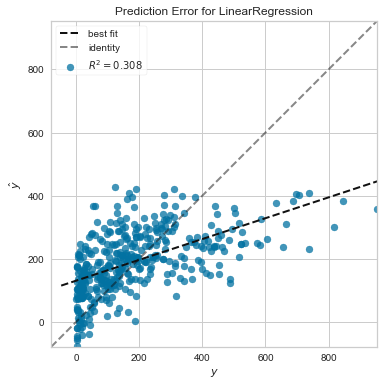

In [30]:
plot_equation(sample, "riders ~ year + hour + temp ")

In [31]:
outcome, predictors = dmatrices("riders ~ C(year) + C(hour) + temp", data=sample)
predictors

DesignMatrix with shape (2000, 26)
  Columns:
    ['Intercept',
     'C(year)[T.1]',
     'C(hour)[T.1]',
     'C(hour)[T.2]',
     'C(hour)[T.3]',
     'C(hour)[T.4]',
     'C(hour)[T.5]',
     'C(hour)[T.6]',
     'C(hour)[T.7]',
     'C(hour)[T.8]',
     'C(hour)[T.9]',
     'C(hour)[T.10]',
     'C(hour)[T.11]',
     'C(hour)[T.12]',
     'C(hour)[T.13]',
     'C(hour)[T.14]',
     'C(hour)[T.15]',
     'C(hour)[T.16]',
     'C(hour)[T.17]',
     'C(hour)[T.18]',
     'C(hour)[T.19]',
     'C(hour)[T.20]',
     'C(hour)[T.21]',
     'C(hour)[T.22]',
     'C(hour)[T.23]',
     'temp']
  Terms:
    'Intercept' (column 0)
    'C(year)' (column 1)
    'C(hour)' (columns 2:25)
    'temp' (column 25)
  (to view full data, use np.asarray(this_obj))

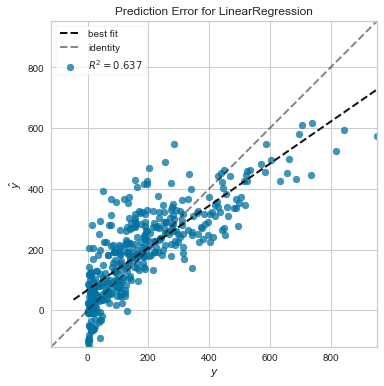

In [32]:
plot_equation(sample, "riders ~ C(year) + C(hour) + temp ")

## Standardize

In [33]:
outcome, predictors = dmatrices(
    "riders ~ C(year) + C(hour) + C(workingday) + humidity", data=sample
)

In [34]:
predictors

DesignMatrix with shape (2000, 27)
  Columns:
    ['Intercept',
     'C(year)[T.1]',
     'C(hour)[T.1]',
     'C(hour)[T.2]',
     'C(hour)[T.3]',
     'C(hour)[T.4]',
     'C(hour)[T.5]',
     'C(hour)[T.6]',
     'C(hour)[T.7]',
     'C(hour)[T.8]',
     'C(hour)[T.9]',
     'C(hour)[T.10]',
     'C(hour)[T.11]',
     'C(hour)[T.12]',
     'C(hour)[T.13]',
     'C(hour)[T.14]',
     'C(hour)[T.15]',
     'C(hour)[T.16]',
     'C(hour)[T.17]',
     'C(hour)[T.18]',
     'C(hour)[T.19]',
     'C(hour)[T.20]',
     'C(hour)[T.21]',
     'C(hour)[T.22]',
     'C(hour)[T.23]',
     'C(workingday)[T.1]',
     'humidity']
  Terms:
    'Intercept' (column 0)
    'C(year)' (column 1)
    'C(hour)' (columns 2:25)
    'C(workingday)' (column 25)
    'humidity' (column 26)
  (to view full data, use np.asarray(this_obj))

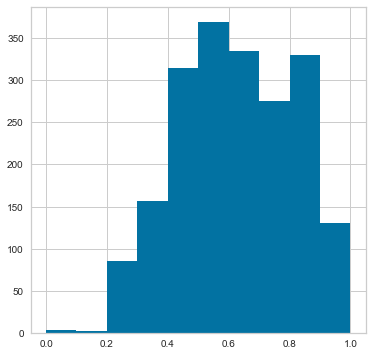

In [35]:
plt.hist(np.asarray(predictors[:, 26]))
plt.show()

In [36]:
outcome, predictors = dmatrices(
    "riders ~ C(year) + C(hour) + C(workingday) + standardize(humidity)", data=sample
)
predictors

DesignMatrix with shape (2000, 27)
  Columns:
    ['Intercept',
     'C(year)[T.1]',
     'C(hour)[T.1]',
     'C(hour)[T.2]',
     'C(hour)[T.3]',
     'C(hour)[T.4]',
     'C(hour)[T.5]',
     'C(hour)[T.6]',
     'C(hour)[T.7]',
     'C(hour)[T.8]',
     'C(hour)[T.9]',
     'C(hour)[T.10]',
     'C(hour)[T.11]',
     'C(hour)[T.12]',
     'C(hour)[T.13]',
     'C(hour)[T.14]',
     'C(hour)[T.15]',
     'C(hour)[T.16]',
     'C(hour)[T.17]',
     'C(hour)[T.18]',
     'C(hour)[T.19]',
     'C(hour)[T.20]',
     'C(hour)[T.21]',
     'C(hour)[T.22]',
     'C(hour)[T.23]',
     'C(workingday)[T.1]',
     'standardize(humidity)']
  Terms:
    'Intercept' (column 0)
    'C(year)' (column 1)
    'C(hour)' (columns 2:25)
    'C(workingday)' (column 25)
    'standardize(humidity)' (column 26)
  (to view full data, use np.asarray(this_obj))

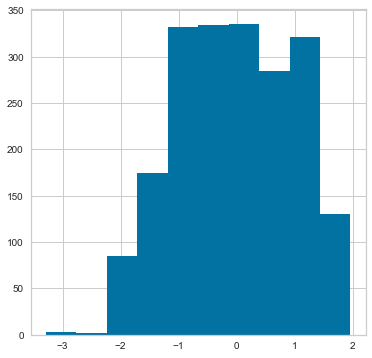

In [37]:
plt.hist(np.asarray(predictors[:, 26]))
plt.show()

# Custom functions

In [38]:
outcome, predictors = dmatrices("riders ~ temp", data=sample)
predictors

DesignMatrix with shape (2000, 2)
  Intercept  temp
          1  0.58
          1  0.46
          1  0.44
          1  0.64
          1  0.44
          1  0.30
          1  0.72
          1  0.70
          1  0.54
          1  0.52
          1  0.76
          1  0.40
          1  0.62
          1  0.42
          1  0.64
          1  0.28
          1  0.62
          1  0.66
          1  0.54
          1  0.50
          1  0.70
          1  0.26
          1  0.66
          1  0.18
          1  0.72
          1  0.76
          1  0.80
          1  0.78
          1  0.50
          1  0.54
  [1970 rows omitted]
  Terms:
    'Intercept' (column 0)
    'temp' (column 1)
  (to view full data, use np.asarray(this_obj))

In [39]:
def multiply_by_two(col):
    return col * 2


equation = "riders ~ multiply_by_two(temp)"

outcome, predictors = dmatrices(equation, data=sample)
predictors

DesignMatrix with shape (2000, 2)
  Intercept  multiply_by_two(temp)
          1                   1.16
          1                   0.92
          1                   0.88
          1                   1.28
          1                   0.88
          1                   0.60
          1                   1.44
          1                   1.40
          1                   1.08
          1                   1.04
          1                   1.52
          1                   0.80
          1                   1.24
          1                   0.84
          1                   1.28
          1                   0.56
          1                   1.24
          1                   1.32
          1                   1.08
          1                   1.00
          1                   1.40
          1                   0.52
          1                   1.32
          1                   0.36
          1                   1.44
          1                   1.52
          1          

# Operators

## `+` Operator

In [40]:
outcome, predictors = dmatrices("riders ~ month + temp", data=sample)
predictors

DesignMatrix with shape (2000, 3)
  Intercept  month  temp
          1      9  0.58
          1     10  0.46
          1      5  0.44
          1      6  0.64
          1      1  0.44
          1      4  0.30
          1      7  0.72
          1      8  0.70
          1     10  0.54
          1      4  0.52
          1      7  0.76
          1      3  0.40
          1      8  0.62
          1     10  0.42
          1      6  0.64
          1     12  0.28
          1      6  0.62
          1      7  0.66
          1     10  0.54
          1      2  0.50
          1      8  0.70
          1      1  0.26
          1      7  0.66
          1      1  0.18
          1      8  0.72
          1      8  0.76
          1      7  0.80
          1      5  0.78
          1      6  0.50
          1      4  0.54
  [1970 rows omitted]
  Terms:
    'Intercept' (column 0)
    'month' (column 1)
    'temp' (column 2)
  (to view full data, use np.asarray(this_obj))

## `-` Operator

In [41]:
outcome, predictors = dmatrices("riders ~ month + temp - 1", data=sample)
predictors

DesignMatrix with shape (2000, 2)
  month  temp
      9  0.58
     10  0.46
      5  0.44
      6  0.64
      1  0.44
      4  0.30
      7  0.72
      8  0.70
     10  0.54
      4  0.52
      7  0.76
      3  0.40
      8  0.62
     10  0.42
      6  0.64
     12  0.28
      6  0.62
      7  0.66
     10  0.54
      2  0.50
      8  0.70
      1  0.26
      7  0.66
      1  0.18
      8  0.72
      8  0.76
      7  0.80
      5  0.78
      6  0.50
      4  0.54
  [1970 rows omitted]
  Terms:
    'month' (column 0)
    'temp' (column 1)
  (to view full data, use np.asarray(this_obj))

## `:` Operator

### Basic example

In [42]:
outcome, predictors = dmatrices("riders ~ month:temp", data=sample)
predictors

DesignMatrix with shape (2000, 2)
  Intercept  month:temp
          1        5.22
          1        4.60
          1        2.20
          1        3.84
          1        0.44
          1        1.20
          1        5.04
          1        5.60
          1        5.40
          1        2.08
          1        5.32
          1        1.20
          1        4.96
          1        4.20
          1        3.84
          1        3.36
          1        3.72
          1        4.62
          1        5.40
          1        1.00
          1        5.60
          1        0.26
          1        4.62
          1        0.18
          1        5.76
          1        6.08
          1        5.60
          1        3.90
          1        3.00
          1        2.16
  [1970 rows omitted]
  Terms:
    'Intercept' (column 0)
    'month:temp' (column 1)
  (to view full data, use np.asarray(this_obj))

### More complicated equation

In [43]:
outcome, predictors = dmatrices(
    "riders ~ (C(year) + C(hour) + C(workingday)) : temp", data=sample
)
predictors

DesignMatrix with shape (2000, 27)
  Columns:
    ['Intercept',
     'C(year)[0]:temp',
     'C(year)[1]:temp',
     'C(hour)[T.1]:temp',
     'C(hour)[T.2]:temp',
     'C(hour)[T.3]:temp',
     'C(hour)[T.4]:temp',
     'C(hour)[T.5]:temp',
     'C(hour)[T.6]:temp',
     'C(hour)[T.7]:temp',
     'C(hour)[T.8]:temp',
     'C(hour)[T.9]:temp',
     'C(hour)[T.10]:temp',
     'C(hour)[T.11]:temp',
     'C(hour)[T.12]:temp',
     'C(hour)[T.13]:temp',
     'C(hour)[T.14]:temp',
     'C(hour)[T.15]:temp',
     'C(hour)[T.16]:temp',
     'C(hour)[T.17]:temp',
     'C(hour)[T.18]:temp',
     'C(hour)[T.19]:temp',
     'C(hour)[T.20]:temp',
     'C(hour)[T.21]:temp',
     'C(hour)[T.22]:temp',
     'C(hour)[T.23]:temp',
     'C(workingday)[T.1]:temp']
  Terms:
    'Intercept' (column 0)
    'C(year):temp' (columns 1:3)
    'C(hour):temp' (columns 3:26)
    'C(workingday):temp' (column 26)
  (to view full data, use np.asarray(this_obj))

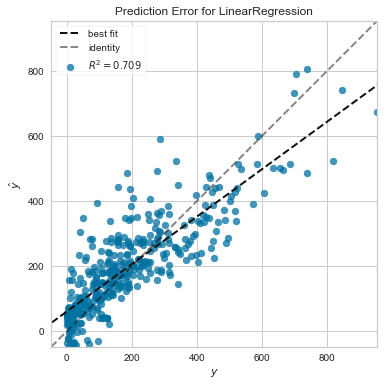

In [44]:
plot_equation(
    sample,
    "riders ~ (C(year) + C(hour) + C(workingday)) : temp",
)

## `*` Operator

In [45]:
outcome, predictors = dmatrices("riders ~ month * temp", data=sample)
predictors

DesignMatrix with shape (2000, 4)
  Intercept  month  temp  month:temp
          1      9  0.58        5.22
          1     10  0.46        4.60
          1      5  0.44        2.20
          1      6  0.64        3.84
          1      1  0.44        0.44
          1      4  0.30        1.20
          1      7  0.72        5.04
          1      8  0.70        5.60
          1     10  0.54        5.40
          1      4  0.52        2.08
          1      7  0.76        5.32
          1      3  0.40        1.20
          1      8  0.62        4.96
          1     10  0.42        4.20
          1      6  0.64        3.84
          1     12  0.28        3.36
          1      6  0.62        3.72
          1      7  0.66        4.62
          1     10  0.54        5.40
          1      2  0.50        1.00
          1      8  0.70        5.60
          1      1  0.26        0.26
          1      7  0.66        4.62
          1      1  0.18        0.18
          1      8  0.72        5.76
    

## `/` Operator

In [46]:
outcome, predictors = dmatrices("riders ~ month / temp", data=sample)
predictors

DesignMatrix with shape (2000, 3)
  Intercept  month  month:temp
          1      9        5.22
          1     10        4.60
          1      5        2.20
          1      6        3.84
          1      1        0.44
          1      4        1.20
          1      7        5.04
          1      8        5.60
          1     10        5.40
          1      4        2.08
          1      7        5.32
          1      3        1.20
          1      8        4.96
          1     10        4.20
          1      6        3.84
          1     12        3.36
          1      6        3.72
          1      7        4.62
          1     10        5.40
          1      2        1.00
          1      8        5.60
          1      1        0.26
          1      7        4.62
          1      1        0.18
          1      8        5.76
          1      8        6.08
          1      7        5.60
          1      5        3.90
          1      6        3.00
          1      4        2.16
  [19

In [47]:
outcome, predictors = dmatrices("riders ~ month / (temp + humidity)", data=sample)
predictors

DesignMatrix with shape (2000, 4)
  Intercept  month  month:temp  month:humidity
          1      9        5.22            8.46
          1     10        4.60            8.80
          1      5        2.20            2.20
          1      6        3.84            4.14
          1      1        0.44            0.51
          1      4        1.20            1.96
          1      7        5.04            4.90
          1      8        5.60            4.88
          1     10        5.40            7.30
          1      4        2.08            1.08
          1      7        5.32            4.90
          1      3        1.20            1.98
          1      8        4.96            6.24
          1     10        4.20            6.70
          1      6        3.84            2.64
          1     12        3.36            6.24
          1      6        3.72            2.28
          1      7        4.62            6.23
          1     10        5.40            8.80
          1      2        

## `**` Operator

### Simple equation

In [48]:
outcome, predictors = dmatrices(
    "riders ~ (temp + humidity + windspeed)**3", data=sample
)
predictors

DesignMatrix with shape (2000, 8)
  Columns:
    ['Intercept',
     'temp',
     'humidity',
     'windspeed',
     'temp:humidity',
     'temp:windspeed',
     'humidity:windspeed',
     'temp:humidity:windspeed']
  Terms:
    'Intercept' (column 0)
    'temp' (column 1)
    'humidity' (column 2)
    'windspeed' (column 3)
    'temp:humidity' (column 4)
    'temp:windspeed' (column 5)
    'humidity:windspeed' (column 6)
    'temp:humidity:windspeed' (column 7)
  (to view full data, use np.asarray(this_obj))

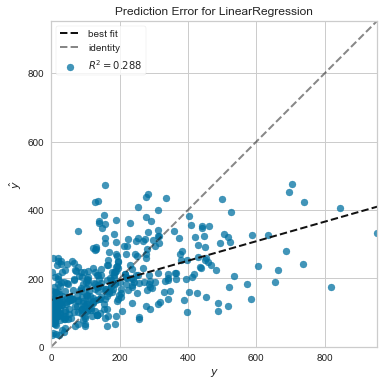

In [49]:
plot_equation(
    sample,
    "riders ~ (temp + humidity + windspeed)**3",
)

### More complicated equation

In [50]:
outcome, predictors = dmatrices(
    "riders ~ (C(year) + C(hour) + C(workingday) + temp) ** 3", data=sample
)
predictors

DesignMatrix with shape (2000, 169)
  Columns:
    ['Intercept',
     'C(year)[T.1]',
     'C(hour)[T.1]',
     'C(hour)[T.2]',
     'C(hour)[T.3]',
     'C(hour)[T.4]',
     'C(hour)[T.5]',
     'C(hour)[T.6]',
     'C(hour)[T.7]',
     'C(hour)[T.8]',
     'C(hour)[T.9]',
     'C(hour)[T.10]',
     'C(hour)[T.11]',
     'C(hour)[T.12]',
     'C(hour)[T.13]',
     'C(hour)[T.14]',
     'C(hour)[T.15]',
     'C(hour)[T.16]',
     'C(hour)[T.17]',
     'C(hour)[T.18]',
     'C(hour)[T.19]',
     'C(hour)[T.20]',
     'C(hour)[T.21]',
     'C(hour)[T.22]',
     'C(hour)[T.23]',
     'C(workingday)[T.1]',
     'C(year)[T.1]:C(hour)[T.1]',
     'C(year)[T.1]:C(hour)[T.2]',
     'C(year)[T.1]:C(hour)[T.3]',
     'C(year)[T.1]:C(hour)[T.4]',
     'C(year)[T.1]:C(hour)[T.5]',
     'C(year)[T.1]:C(hour)[T.6]',
     'C(year)[T.1]:C(hour)[T.7]',
     'C(year)[T.1]:C(hour)[T.8]',
     'C(year)[T.1]:C(hour)[T.9]',
     'C(year)[T.1]:C(hour)[T.10]',
     'C(year)[T.1]:C(hour)[T.11]',
     'C(year)[

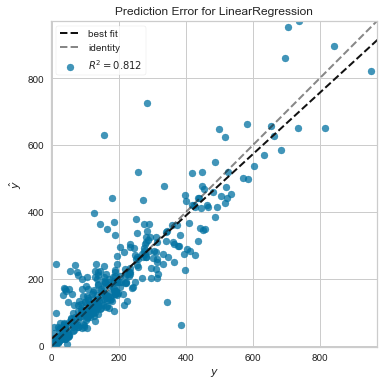

In [51]:
plot_equation(
    sample,
    "riders ~ (C(year) + C(hour) + C(workingday) + temp) ** 3",
)

More feature is not alway better

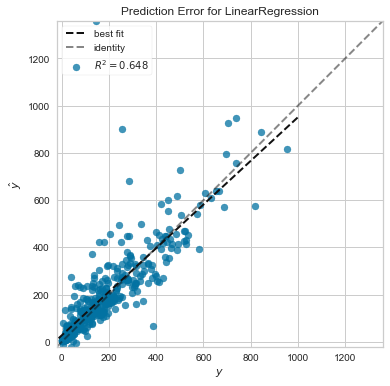

In [52]:
plot_equation(
    sample,
    "riders ~ (C(year) + C(hour) + C(workingday) + temp + humidity) ** 5",
)

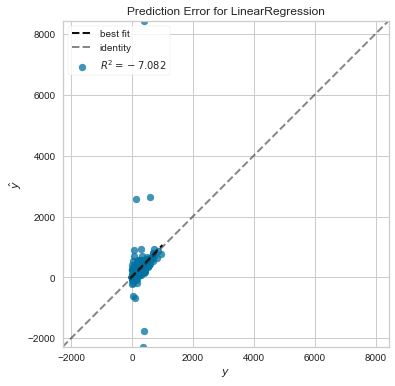

In [53]:
plot_equation(
    sample,
    "riders ~ (C(year) + C(hour) + C(workingday) + temp + humidity + windspeed) ** 6",
)